In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import plotly.graph_objects as go
plt.style.use("ggplot")

In [2]:
#triangle distribution
def f_t(x, a, b):
    c = (a+b)/2
    if a <= x <= c:
        return 2*(x-a)/((b-a)*(c-a))
    elif c < x <= b:
        return 2*(b-x)/((b-a)*(b-c))
    else:
        return 0

#parabolic distribution
def f_p(x, a, b):
    return (6*(x-a)*(b-x))/(b-a)**3
    
N = 100
dx = 0.1
dt = 1

t=100

alpha = -250
r=10
x = np.linspace(0, r, N)

In [55]:
def solution(f, N=20, r=1, dt=0.5):
    x = np.linspace(0, r, N)
    initial_temp = [f(i,0,r) for i in x]
    matrix = [initial_temp]

    for j in range(t):
        matrix.append([0]*N)
        
    for j in range(t):
        for i in range(2, N-2):
            matrix[j+1][i] = 2*matrix[j][i]-matrix[j-1][i]+dt*((matrix[j][i+2]-4*matrix[j][i+1]+6*matrix[j][i]-\
                    -4*matrix[j][i-1]+matrix[j][i-2])/dx**4+(2/r)*(matrix[j][i+2]-2*matrix[j][i+1]+2*matrix[j][i-1]+\
                    +matrix[j][i-2])/(dx**3)-(1/r**2)*(matrix[j][i+1]-2*matrix[j][i]+matrix[j][i-1])/dx**2+\
                    +(1/r**3)*(matrix[j][i+1]-matrix[j][i])/dx)/alpha
    return matrix       

In [66]:
def solution(f, N=20, r=1, dt=0.5):
    x = np.linspace(0, r, N)
    initial_temp = [f(i,0,r) for i in x]
    matrix = [initial_temp]

    for j in range(t):
        matrix.append([0]*N)
        
    for j in range(t):
        for i in range(2, N-2):
            matrix[j+1][i] = 2*matrix[j][i]-matrix[j-1][i]+(dt**2)*(matrix[j][i+2]-4*matrix[j][i+1]+6*matrix[j][i]-\
                    -4*matrix[j][i-1]+4*matrix[j][i-2]+(2/r)*(matrix[j][i+2]-2*matrix[j][i+1]+2*matrix[j][i-1]+\
                    +matrix[j][i-2])-(1/r**2)*(matrix[j][i+1]-2*matrix[j][i]+matrix[j][i-1])+\
                    +(1/r**3)*(matrix[j][i+1]-matrix[j][i]))/alpha
    return matrix 

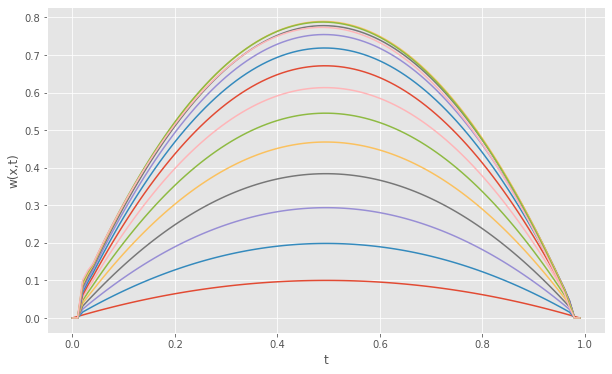

In [67]:
N = 100
dx = 1
dt = 0.01
t = 40


alpha = -0.07
# alpha = -0.03
# alpha = -1
r = 15

plt.subplots(figsize=(10,6))
s = solution(f_p, N, r, dt)
t1 = np.arange(0, 1, dt)

for i in range(14):
    plt.plot(t1, s[i])
    

# plt.legend()
plt.xlabel('t')
plt.ylabel('w(x,t)')
plt.show()

In [68]:
t1 = np.arange(0, t, dt)
fig = go.Figure(go.Surface(
#     contours = {
#         "x": {"show": True, "start": 1.5, "end": 2, "size": 0.04, "color":"white"},
#         "z": {"show": True, "start": 0.5, "end": 0.8, "size": 0.05}
#     },
    x = x,
    y = t1,
    z = s))
fig.update_layout(
        scene = {
            "xaxis": {"nticks": 20},
            "zaxis": {"nticks": 4},
            'camera_eye': {"x": 0, "y": -1, "z": 0.5},
            "aspectratio": {"x": 1, "y": 1, "z": 0.2}
        })
fig.show()